In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("./data/Our_labeled_eyewitness_tweets/CaliforniaFire_raw_full.csv.token.csv")

In [4]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'accessible', 'accessible:confidence', 'relevant',
       'relevant:confidence',
       'what_is_the_source_of_the_information_communicated_in_this_tweet',
       'what_is_the_source_of_the_information_communicated_in_this_tweet:confidence',
       'accessible_gold', 'relevant_gold', 'tweet_link',
       'what_is_the_source_of_the_information_communicated_in_this_tweet_gold',
       'tweet_text', 'hashtags', 'usermentions', 'urls', 'retweet_count',
       'is_reply', 'not_known', 'contains_deictic', 'tweet_id',
       'full_tweet_text', 'eye_witness', 'label_new', 'tweet_cleaned'],
      dtype='object')

In [5]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,accessible,accessible:confidence,relevant,relevant:confidence,what_is_the_source_of_the_information_communicated_in_this_tweet,...,urls,retweet_count,is_reply,not_known,contains_deictic,tweet_id,full_tweet_text,eye_witness,label_new,tweet_cleaned
0,1907563114,False,finalized,3,9/13/2018 03:09:11,True,1.0,True,1.0,Information not originating from eyewitnesses ...,...,NaN,1,0,0.0,0.0,917546790282452992,At least 10 people are dead and more than 1500...,no,NotEyewitness,rt <allcaps> <user> : at least <number> people...
1,1907563116,False,finalized,3,9/13/2018 03:45:48,True,1.0,True,1.0,Information not originating from eyewitnesses ...,...,#https://t.co/RQstuYbOEi,0,0,0.0,0.0,917837448423624704,WhiteHouse: https://t.co/RQstuYbOEi - Remarks ...,no,NotEyewitness,whitehouse : <url> - remarks by vice president...
2,1907563117,False,finalized,3,9/13/2018 02:08:26,True,1.0,True,1.0,Information not originating from eyewitnesses ...,...,#https://t.co/WYrYLatM1i,0,0,0.0,0.0,917640081342648320,I liked a @YouTube video https://t.co/WYrYLatM...,no,NotEyewitness,i liked a <user> video <url> raw <allcaps> vid...
3,1907563118,False,finalized,3,9/13/2018 01:35:26,True,1.0,True,1.0,Information not originating from eyewitnesses ...,...,#https://t.co/HuSay9pwYH,2,0,0.0,0.0,917872944206024704,#Video #News via #CNN: Death toll climbs to 15...,no,NotEyewitness,rt <allcaps> <user> : <hashtag> video <hashtag...
4,1907563119,False,finalized,3,9/13/2018 02:04:50,True,1.0,True,1.0,Information not originating from eyewitnesses ...,...,#https://t.co/bsZwAduBrS,0,0,0.0,0.0,918481514551218177,RT NatGeo These are the powerful images emergi...,no,NotEyewitness,rt <allcaps> natgeo these are the powerful ima...


In [7]:
df_ew = df[ df['label_new'] == 'Eyewitness' ]

In [11]:
text = ' '.join(tweet for tweet in df_ew.tweet_cleaned)
print ("There are {} words in the combination of all eyewitness tweets.".format(len(text)))

There are 8507 words in the combination of all eyewitness tweets.


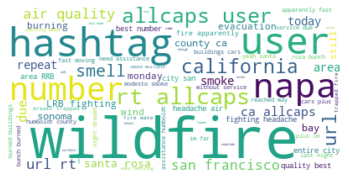

In [15]:
# stopwords = set(['rt', 'allcaps', 'url', 'user', 'LRB']) # some placeholders used in cleaning and some Tokenizer label
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
wordcloud.to_file("CAwildfire.png")

In [17]:
df = pd.read_csv("./data/Our_labeled_eyewitness_tweets/Harvey_raw_full.csv.token.csv")

There are 80387 words in the combination of all eyewitness tweets.


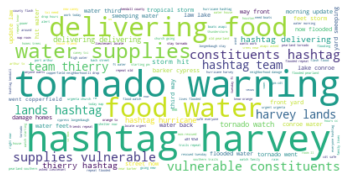

In [22]:
df_ew = df[ df['label_new'] == 'Eyewitness' ]
text = ' '.join(tweet for tweet in df_ew.tweet_cleaned)
print ("There are {} words in the combination of all eyewitness tweets.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)

# some placeholders used in cleaning and some Tokenizer label
stopwords.update(['rt', 'allcaps', 'url', 'user', 'LRB', 'RBB', 'number'])

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("Harvey.png")